In [1]:
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = os.getcwd()
data_all = pd.read_csv(directory + '/input_data.csv', sep=',') 

In [3]:
#all columns
data_all.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,T0,T1,T3,T4,T5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,5,4,740.0,736.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,24,409.0,385.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5,15,596.0,581.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,29,501.0,472.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3,56,264.0,208.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


***INCLUDING IMPORTANT FEATURES ONLY***

In [4]:
#creating df with only important features
data = data_all[['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY','HELD_INDICATOR', 'T0', 'T1', 'T4',\
                 'T5', 'T10', 'T12', 'T14', 'T15','T17', 'T21', 'T25', 'T27', 'T35', 'T37', '10457.0', '11207.0',\
                 'City_2.0', 'City_4.0', 'City_15.0', 'City_17.0', 'City_37.0','City_42.0', 'Comm_105.0', 'Schl_8.0',\
                 'Schl_9.0', 'Schl_10.0','Schl_27.0', 'Schl_28.0', 'Con_6.0', 'Con_7.0', 'Con_8.0', 'Con_9.0',\
                 'Con_10.0', 'Con_11.0', 'Con_12.0', 'Con_13.0', 'Con_14.0', 'Con_15.0','Day_0', 'Day_1', 'Day_2',\
                 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Hr_0','Hr_1', 'Hr_2', 'Hr_3', 'Hr_4', 'Hr_5', 'Hr_6', 'Hr_7', \
                 'Hr_8', 'Hr_9','Hr_10', 'Hr_11', 'Hr_12', 'Hr_13', 'Hr_14', 'Hr_15', 'Hr_16', 'Hr_17','Hr_18', \
                 'Hr_19', 'Hr_20', 'Hr_21', 'Hr_22', 'Hr_23', 'Month_1','Month_2', 'Month_3', 'Month_4', 'Month_5',\
                 'Month_6', 'Month_7','Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12','INCIDENT_TRAVEL_TM_SECONDS_QY']]

In [5]:
#df with features from feature selection
data.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,INCIDENT_TRAVEL_TM_SECONDS_QY
0,5,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,736.0
1,2,24,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,385.0
2,5,15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,581.0
3,1,29,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,472.0
4,3,56,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,208.0


In [6]:
data.shape

(50000, 85)

***BINNING INCIDENT_TRAVEL_TM (DISCRETIZING)***

In [47]:
#bins; change n to change num of bins
n = 5 
max = 1025
bin_width = max/n #+1 because we have n bins so n+1 endpoints
bin_width

205.0

In [48]:
#bin ranges
bins = np.linspace(0,max,n+1)
bins

array([   0.,  205.,  410.,  615.,  820., 1025.])

In [49]:
#labels for bin ranges
labels = list(range(1,n+1))
labels

[1, 2, 3, 4, 5]

In [50]:
#df to visualize bins
df = pd.DataFrame(data = labels)
df['start'] = bins[:bins.shape[0]-1]
df['end'] = bins[1:]
df

,0,start,end
0,1,0.0,205.0
1,2,205.0,410.0
2,3,410.0,615.0
3,4,615.0,820.0
4,5,820.0,1025.0


In [11]:
#coding continuous data based on bins/labels, removing continuous data cols
data['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
data = data.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])
data.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,INCIDENT_TRAVEL_TM_SECONDS_QY_Bin
0,5,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
1,2,24,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
2,5,15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,1,29,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,3,56,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [12]:
import collections
from collections import Counter

In [13]:
travel_tm = collections.Counter(data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
travel_tm_count = sum(travel_tm.values())
travel_tm

Counter({4: 5700, 2: 22025, 3: 14376, 5: 2210, 1: 5689})

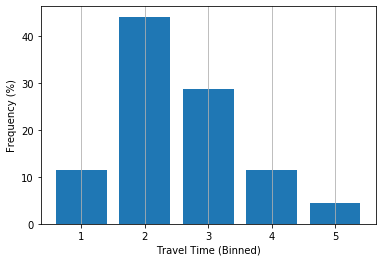

In [14]:
#visualize count of data within each bin
travel_tm = {k: (v*100) / travel_tm_count for k, v in travel_tm.items()} #mult by 100 to turn into percent
plt.bar(travel_tm.keys(),travel_tm.values())
plt.grid(axis = 'x')
plt.xlabel("Travel Time (Binned)")
plt.ylabel("Frequency (%)")
plt.show()

***BINNING DISPATCH RESPONSE TIME (DISCRETIZING)***

In [23]:
#bins; change n to change num of bins
n_r = 20 
max_r = 68
bin_width_r = max_r/n_r 
bin_width_r

3.4

In [43]:
#bin ranges
bins_r = np.linspace(0,max_r,n_r+1)
bins_r

array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ,
       37.4, 40.8, 44.2, 47.6, 51. , 54.4, 57.8, 61.2, 64.6, 68. ])

In [44]:
#labels for bin ranges
labels_r = list(range(1,n_r+1))
labels_r

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [45]:
#df to visualize bins
df = pd.DataFrame(data = labels_r)
df['start'] = bins_r[:bins_r.shape[0]-1]
df['end'] = bins_r[1:]
df

,0,start,end
0,1,0.0,3.4
1,2,3.4,6.8
2,3,6.8,10.2
3,4,10.2,13.6
4,5,13.6,17.0
5,6,17.0,20.4
6,7,20.4,23.8
7,8,23.8,27.2
8,9,27.2,30.6
9,10,30.6,34.0


In [ ]:
#coding continuous data based on bins/labels, removing continuous data cols
data['DISPATCH_RESPONSE_SECONDS_QY_Bin'] = pd.cut(data['DISPATCH_RESPONSE_SECONDS_QY'],bins_r,labels=labels_r)
data = data.drop(columns = ['DISPATCH_RESPONSE_SECONDS_QY'])
data.head()

In [ ]:
disp_tm = collections.Counter(data["DISPATCH_RESPONSE_SECONDS_QY_Bin"])
disp_tm_count = sum(disp_tm.values())
disp_tm

In [ ]:
#visualize count of data within each bin
disp_tm = {k: (v*100) / disp_tm_count for k, v in disp_tm.items()} #mult by 100 to turn into percent
plt.bar(disp_tm.keys(),disp_tm.values())
plt.grid(axis = 'x')
plt.xlabel("Dispatch Response Time (Binned)")
plt.ylabel("Frequency (%)")
plt.show()

***SPLITTING TRAIN / TEST***

In [ ]:
#X is predictors, Y is value to be predicted
X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
#splitting into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [ ]:
X_train.head()

In [ ]:
Y_train.head()

In [ ]:
X_test.head()

In [ ]:
Y_test.head()

***LINEAR DISCRIMINANT ANALYSIS***

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)

In [ ]:
lda.score(X_train,Y_train)

In [ ]:
lda.score(X_test,Y_test)

In [ ]:
Y_lda_predict = lda.predict(X_test)
Y_lda_predict

***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

In [ ]:
knn.score(X_train, Y_train)

In [ ]:
knn.score(X_test, Y_test)

In [ ]:
Y_knn_predict = knn.predict(X_test)
Y_knn_predict

Confusion matrix, error rate, roc/auc, lift